# Tweet Sentiment Analysis Project

by Brian Amani

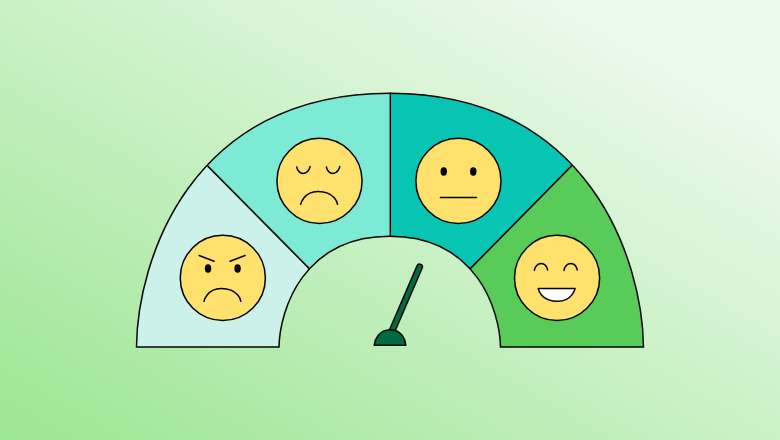

# Overview
### Business Problem

Companies rely on social media to understand how customers feel about their brands and products. However, it’s not always easy to tell whether a tweet expresses a clear opinion or which brand the sentiment is directed at, especially when multiple brands are mentioned.

This project will develop a sentiment analysis model that can:

- Classify tweets as positive, negative, or neutral.
- Correctly link emotions to the right brand or product.
- Track sentiment trends over time to spot issues or opportunities early.

With better sentiment tracking, businesses can fine-tune their marketing, improve customer engagement, and respond faster to brand perception shifts.

### Data Overview

In this project, I will analyze a dataset from CrowdFlower (https://data.world/crowdflower/brands-and-product-emotions/) on the data.world website. The dataset contains over 9000 tweets with sentiments on apple and google products. These sentiments can be classified into positive, neutral and negative sentiments and a quick scan of the data shows they were collected during the SXSW (South by South West) concert seemingly in 2013.

### Approach

### My Thinking
I decided on an approach that would categorize the data into positive and non positive tweets, which would allow a binary approach further considering that positive sentiments would be the ones to most likely be used to drive sales up, and non positive sentiments be studied to establish where to improve products.

### Accuracy:
I also endevoured to achieve as accurate a model as possible as it would allow me to avoid any false positive/negative results that would affect a users ability to utilize the output of the model.

### Modelling
I used nltk's TweetTokenizer and RegexpTokenizer to tokenize the tweets. and further used vectorizer and tfidf vectorizer to vectorize them. 

Some key techniques I also experimented with:

- Naïve Bayes and Logistic Regression for baseline performance,
- CatBoost, optimized for categorical data
- Neural Networks to capture complex patterns in sentiment.

Whicha allowed me to test simple to complex approaches

## Data Understanding

In [342]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import RegexpTokenizer, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re

from sklearn.model_selection import train_test_split, cross_validate
from numpy import array
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras import regularizers, layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Amani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [343]:
# Loading the dataset
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [344]:
print(df.describe)

<bound method NDFrame.describe of                                              tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...              

## Data Cleaning

In [345]:
# Checking for duplicates
print('Duplicate rows')
print(df.duplicated().sum())
print(("-"*10))
print('Total null values')
print(df.isna().sum())
print(("-"*10))
print(df.info())

Duplicate rows
22
----------
Total null values
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


#### There are 22 duplicate rows and many null values. These need to be dropped. 

In [346]:
#dropping any NaN in the Tweet column
df['tweet_text'].dropna(inplace=True)
#dropping duplicates
df.drop_duplicates(inplace=True)
print(("-"*10))
print(df.info())
print(("-"*10))
print('Total duplicated rows')
print(df.duplicated().sum())
print(("-"*10))
print('Total null values')
print(df.isna().sum())

----------
<class 'pandas.core.frame.DataFrame'>
Index: 9071 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9070 non-null   object
 1   emotion_in_tweet_is_directed_at                     3282 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9071 non-null   object
dtypes: object(3)
memory usage: 283.5+ KB
None
----------
Total duplicated rows
0
----------
Total null values
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5789
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


In [347]:
#Rename columns 
df = df.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [348]:
def is_mostly_symbols(text, threshold=0.7):
    """Returns True if more than `threshold` fraction of characters are special characters."""
    if not isinstance(text, str) or not text.strip():  
        return True  # Remove empty or non-string values
    
    special_chars = sum(1 for char in text if not char.isalnum() and char != " ")
    return (special_chars / len(text)) > threshold  # Remove if too many symbols

# Keep only rows that are NOT mostly symbols
df = df[~df["Tweet"].apply(is_mostly_symbols)]  

# Print first few rows to verify
df


,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [349]:
df = df[df["Tweet"].apply(lambda x: x.encode('utf-8').decode('utf-8', 'ignore') == x if isinstance(x, str) else True)]
df


,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [350]:
#drops Tweets with nonsensical characters
df.drop([1, 9092], inplace=True)
#Reset index
df.reset_index(inplace=True)
df.drop(columns="index", inplace = True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
2,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
3,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
4,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
...,...,...,...
9063,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9064,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9065,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9066,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product


#### There are still NaN values in "Product". I will fill those with "Unspecified" to make visualization easier

In [351]:
#Filling NaN in "Product" with "Unspecified"
df['Product'].fillna("Unspecified", inplace = True)
df

C:\Users\Amani\AppData\Local\Temp\ipykernel_15956\1443895236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product'].fillna("Unspecified", inplace = True)


,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
2,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
3,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
4,@teachntech00 New iPad Apps For #SpeechTherapy...,Unspecified,No emotion toward brand or product
...,...,...,...
9063,"@mention Yup, but I don't have a third app yet...",Unspecified,No emotion toward brand or product
9064,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9065,"Wave, buzz... RT @mention We interrupt your re...",Unspecified,No emotion toward brand or product
9066,"Google's Zeiger, a physician never reported po...",Unspecified,No emotion toward brand or product


In [352]:
df["Product"].value_counts()


Product
Unspecified                        5787
iPad                                945
Apple                               659
iPad or iPhone App                  468
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

#### There are too many rows in which the product is not specified. I will attempt to scrape the data set and determine the product and then introduce a new classification called Brand.

In [353]:
def find_brand(Product, Tweet):
    # Checking "Unspecified" column to identify brand
    brand = 'Unspecified'
    if ((Product.lower().__contains__('google')) or (Product.lower().__contains__('android'))):
        brand = 'Google'
    elif ((Product.lower().__contains__('apple')) or (Product.lower().__contains__('ip'))):
        brand = 'Apple'
    
    if (brand == 'Unspecified'): 
        lower_tweet = Tweet.lower()
        is_google = (lower_tweet.__contains__('google')) or (lower_tweet.__contains__('android'))
        is_apple = (lower_tweet.__contains__('apple')) or (lower_tweet.__contains__('ip'))

        # Labelling the brands
        if (is_google and is_apple):
            brand = 'Both mentioned'
        elif (is_google):
            brand = 'Google'
        elif (is_apple):
            brand = 'Apple'
    
    return brand

df['Brand'] = df.apply(lambda x: find_brand(x['Product'], x['Tweet']), axis = 1) 
df['Brand'].value_counts() 

Brand
Apple             5360
Google            2756
Unspecified        739
Both mentioned     213
Name: count, dtype: int64

#### The data is now more presentable and can be used to train our model. Before we move to preprocessing for modelling, let us visualize the data and gather any insights we need

# Data Visualization

In [354]:
def countplot(df, col, hue=None, rotation=None):
    
    fig, ax = plt.subplots(figsize=(12,8))
    sns.countplot(data = df, x = col, hue = hue, order = df[col].value_counts().index)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation= rotation, fontsize = 15)
    ax.set_xlabel(xlabel = col, fontsize = 20)
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.set_ylabel(ylabel = "Number of Tweets", fontsize = 20)
    ax.set_title(f"Number of Tweets per {col}", fontsize = 30)
    plt.show()

In [355]:
# Rephrase "No emotion towards brand or product" to "No emotion"
df["Sentiment"] = df["Sentiment"].replace("No emotion toward brand or product", "No emotion")

C:\Users\Amani\AppData\Local\Temp\ipykernel_15956\4197030935.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation= rotation, fontsize = 15)


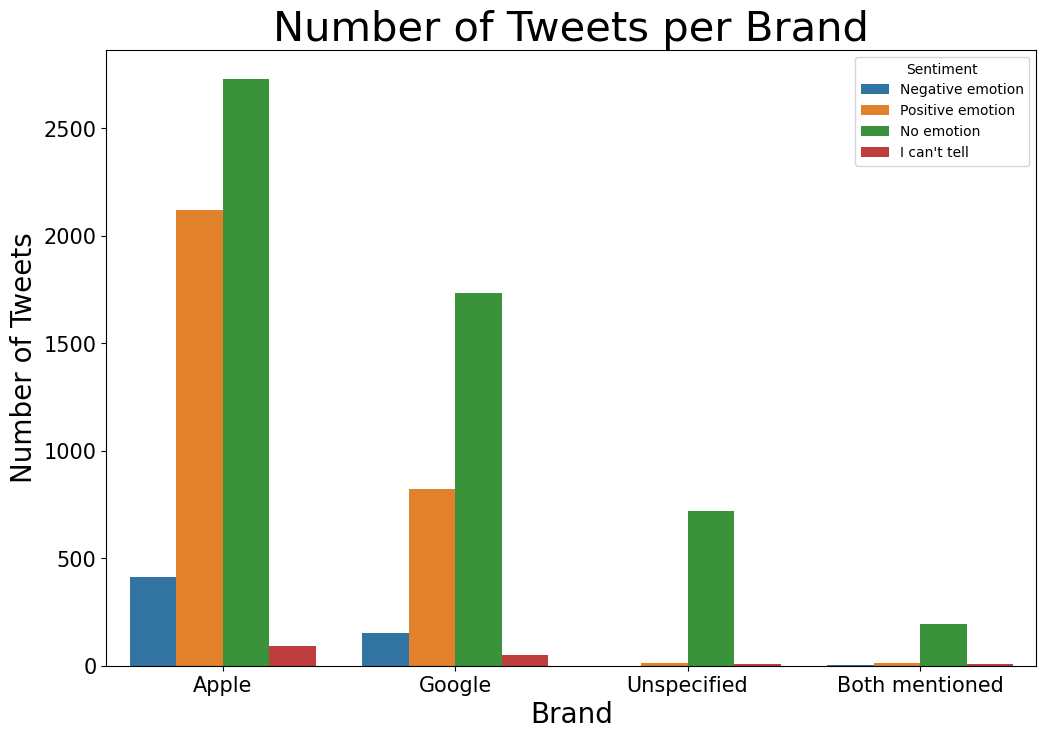

                                 Tweet  Product
Brand          Sentiment                       
Apple          I can't tell         93       93
               Negative emotion    415      415
               No emotion         2730     2730
               Positive emotion   2122     2122
Both mentioned I can't tell          7        7
               Negative emotion      3        3
               No emotion          192      192
               Positive emotion     11       11
Google         I can't tell         50       50
               Negative emotion    150      150
               No emotion         1733     1733
               Positive emotion    823      823
Unspecified    I can't tell          6        6
               Negative emotion      1        1
               No emotion          719      719
               Positive emotion     13       13


In [356]:
countplot(df, "Brand", hue = "Sentiment")
# Display this information quantitatively in a table
grouped = df.groupby(["Brand", "Sentiment"]).count()
print(grouped)

C:\Users\Amani\AppData\Local\Temp\ipykernel_15956\4197030935.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation= rotation, fontsize = 15)


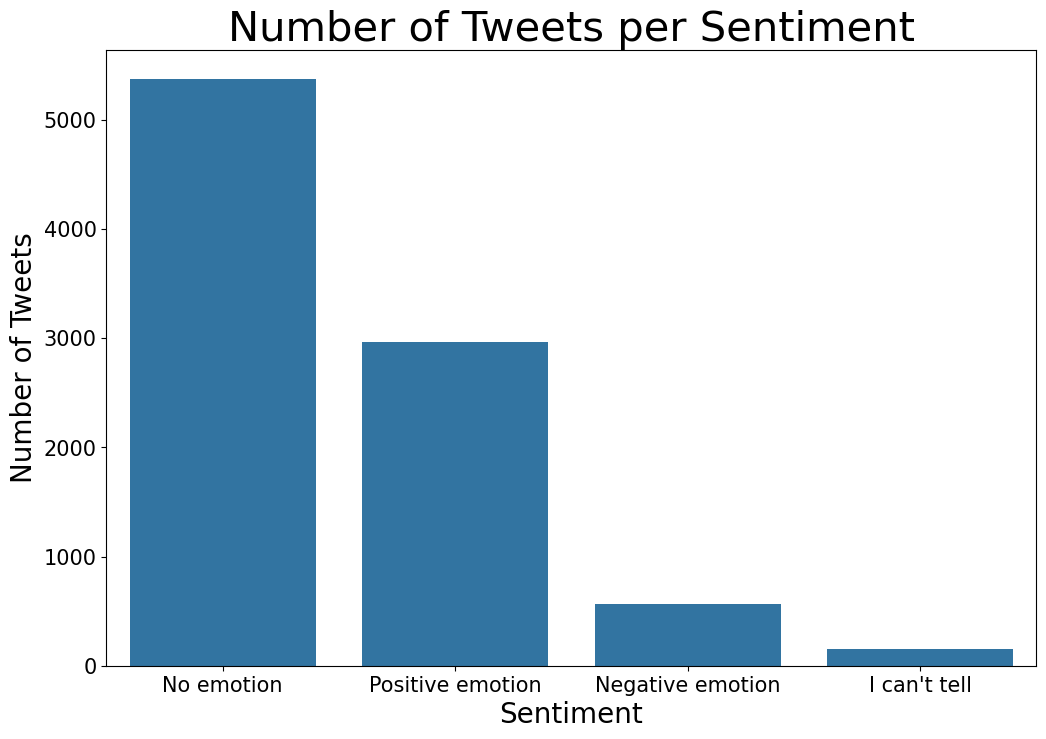

Sentiment
No emotion          5374
Positive emotion    2969
Negative emotion     569
I can't tell         156
Name: count, dtype: int64


In [357]:
countplot(df, "Sentiment")
print(df['Sentiment'].value_counts())

#### There are no major comments on the data. I moved to preprocessing for modelling. 
- Training data will be the tweet
- Target data will be the sentiments

Based on the data as seen above, it is now important to have binary target data, in this case the sentiments. This will enable us to train our model effectively

# Data Preprocessing

To make our target Binary we need two categories:
- Not positive: No emotion, negative emotion & I can't tell
- Positive: Positive emotion

In [358]:
df['Sentiment'] = df['Sentiment'].map({'No emotion':0, 
             'Positive emotion':1,
             'Negative emotion':0,
             "I can't tell": 0})
df

,Tweet,Product,Sentiment,Brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,Apple
1,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,Apple
2,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,Apple
3,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,Google
4,@teachntech00 New iPad Apps For #SpeechTherapy...,Unspecified,0,Apple
...,...,...,...,...
9063,"@mention Yup, but I don't have a third app yet...",Unspecified,0,Google
9064,Ipad everywhere. #SXSW {link},iPad,1,Apple
9065,"Wave, buzz... RT @mention We interrupt your re...",Unspecified,0,Google
9066,"Google's Zeiger, a physician never reported po...",Unspecified,0,Google


C:\Users\Amani\AppData\Local\Temp\ipykernel_15956\405641662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Sentiment", order = df["Sentiment"].value_counts().index , palette="husl")
C:\Users\Amani\AppData\Local\Temp\ipykernel_15956\405641662.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ["Not Positive", "Positive"], fontsize = 15)


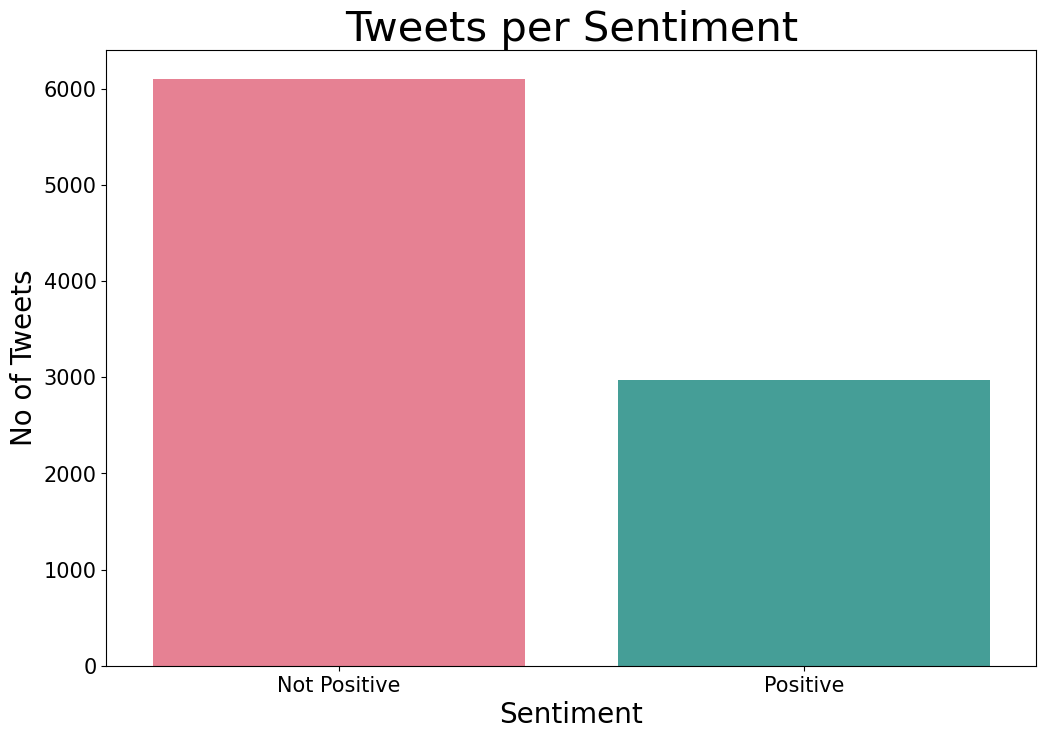

In [359]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x = "Sentiment", order = df["Sentiment"].value_counts().index , palette="husl")
ax.set_xticklabels(labels = ["Not Positive", "Positive"], fontsize = 15)
ax.set_xlabel(xlabel = "Sentiment", fontsize = 20)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_ylabel(ylabel = "No of Tweets", fontsize = 20)
ax.set_title(f"Tweets per Sentiment", fontsize = 30)
plt.show()

Before we can do a test-train split, let us clean our tweets. We will remove:
- stop words
- short words, punctuations and signs
- placeholders such as "link" and "video"
- websites
- special characters


In [360]:
#Instantiate necessary tools
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")
stopwords_list = stopwords.words("english")
stopwords_list.append("sxsw")
stopwords_list.append("link")
lemma = WordNetLemmatizer()
tweet_tknzr = TweetTokenizer(strip_handles=True)

In [361]:
def cleaned_tweets(text):
    
    #Remove handles from tweets
    no_handle = tweet_tknzr.tokenize(text)
    tweet = " ".join(no_handle) 
    #removing any punctuations, signs, placeholders, websites and special characters
    clean = re.sub("(https?:\/\/\S+) \
                   |(#[A-Za-z0-9_]+) \
                   |(\{([a-zA-Z].+)\}) \
                   |(&[a-z]+;) \
                   |(www\.[a-z]?\.?(com)+|[a-z]+\.(com))\
                   |({link})\
                   |(\[video\])\
                   |([^\x00-\x7F]+\ *(?:[^\x00-\x7F]| )*)"," ", tweet)
    #making lowercase
    lower = clean.lower()
    #Removing short words (less than 3 characters)
    token_list = tokenizer.tokenize(lower)
    # Removing stop words
    stopwords_removed=[token for token in token_list if token not in stopwords_list]
    #Lemmatizing remaining tokens
    lemma_list = [lemma.lemmatize(token) for token in stopwords_removed]
    
    cleaned_text = " ".join(lemma_list) 
    return cleaned_text

Test-Train split

In [362]:
# Tweets as input variables
X = df[['Tweet']]
# Sentiments as target
y = df['Sentiment']
#First train test split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

#Second train test split
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=42)
X_train

,Tweet
4878,"Really? So, no Google Me or Circles for now? R..."
1605,Nice! RT @mention knitted staircase in attenda...
732,Posterous Joins The SXSW Pile On With Posterou...
4073,Hope people ask the tough questions. RT @menti...
2119,"NYT, WSJ at #SXSW ask: Is there a future for b..."
...,...
499,Is he the first person in the queue at the new...
7826,Qrafter is better than all paid or free QR Cod...
8834,@mention Was just chatting with someone about ...
2745,The iPhone version of Flipboard is being total...


In [364]:
#Checking
cleaned_tweets(X_train['Tweet'].iloc[5622])

'actually giving away free taplynx iphone ipad app licence away bit pushsxsw11 check'

In [368]:
#Applying across our training data
X_train['Tweet'] = X_train['Tweet'].apply(lambda x: cleaned_tweets(x))
X_val['Tweet'] = X_val['Tweet'].apply(lambda x: cleaned_tweets(x))
print(X_train)
print("_________________")
print(X_val)
print("_________________")
print(y_train)
print("_________________")
print(y_val)

                                                  Tweet
4878  really google circle launching product plenty ...
1605  nice knitted staircase attendance party tomo 7...
732   posterous join pile posterous event iphone tec...
4073  hope people ask tough question reminder androi...
2119   nyt wsj ask future branded native news apps ipad
...                                                 ...
499       first person queue new apple store austin may
7826  qrafter better paid free code apps scan vcards...
8834  chatting someone proliferation ipad like ipad ...
2745  iphone version flipboard totally redesigned pl...
2730  front gate ticket present morning party http s...

[6120 rows x 1 columns]
_________________
                                                  Tweet
2437  google bing page rank panel ridiculously crowd...
8170  xcitng approaching soft launch plan android de...
8914  join lenewz free donut massage trade show boot...
8726  twitter buzz apple store temporary apple store...
7491 